In [1]:
import json
import pandas as pd
import numpy as np

In [4]:
with open('sample_data.json', 'r') as f:
  data_ex = json.load(f)

In [ ]:
! pip install flatdict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for flatdict: filename=flatdict-4.0.1-py3-none-any.whl size=6946 sha256=adbe176b2dc795eddfa22457f4ab673b8ce375152bab7876872389d877231cec
  Stored in directory: /root/.cache/pip/wheels/93/67/8f/9d074db7f341c7a487f1dfb9758390cf8108f87ab78fda89ef
Successfully built flatdict


In [ ]:
data_ex['results'][0].keys()

dict_keys(['safetyreportversion', 'safetyreportid', 'primarysourcecountry', 'occurcountry', 'transmissiondateformat', 'transmissiondate', 'reporttype', 'serious', 'receivedateformat', 'receivedate', 'receiptdateformat', 'receiptdate', 'fulfillexpeditecriteria', 'reportduplicate', 'primarysource', 'sender', 'receiver', 'patient'])

In [ ]:
import flatdict
d =  flatdict.FlatDict(data_ex['results'][0], delimiter='.')

In [ ]:
d['reportduplicate.duplicatesource']

'FDA-CTU'

In [ ]:
for key in d.keys():
  print(key)
  print(len(d[key]), ' | ', d[key])
  print('*'*100)

safetyreportversion
1  |  1
****************************************************************************************************
safetyreportid
8  |  16730706
****************************************************************************************************
primarysourcecountry
2  |  US
****************************************************************************************************
occurcountry
2  |  US
****************************************************************************************************
transmissiondateformat
3  |  102
****************************************************************************************************
transmissiondate
8  |  20191005
****************************************************************************************************
reporttype
1  |  1
****************************************************************************************************
serious
1  |  2
***********************************************************************************

In [ ]:
d['patient.reaction'][0]

{'reactionmeddraversionpt': '22.0',
 'reactionmeddrapt': 'Blood pressure abnormal'}

In [ ]:
import tqdm

In [ ]:
ld = []
for i in tqdm.notebook.tqdm(range(len(data_ex['results']))):
  d =  flatdict.FlatDict(data_ex['results'][i], delimiter='.')

  for key in d.keys():
    #print(key)
    if isinstance(d[key],list):
      for i in range(len(d[key])):
        #print(i)
        dico = flatdict.FlatDict(d[key][i],delimiter = '.')
        d.update(dico)
      del d[key]

  for key in d.keys():
    if isinstance(d[key],list):
      if len(d[key])>1:
        del d[key]
      elif len(d[key])==1:
        d[key] = d[key][0]
  ld.append(d)

  0%|          | 0/12000 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(ld)

In [ ]:
df

,actiondrug,activesubstance.activesubstancename,authoritynumb,companynumb,drugadditional,drugadministrationroute,drugauthorizationnumb,drugbatchnumb,drugcharacterization,drugcumulativedosagenumb,...,sender.sendertype,serious,seriousnesscongenitalanomali,seriousnessdeath,seriousnessdisabling,seriousnesshospitalization,seriousnesslifethreatening,seriousnessother,transmissiondate,transmissiondateformat
0,NaN,HYDROCHLOROTHIAZIDE,NaN,NaN,2,048,NaN,NaN,2,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20191005,102
1,NaN,LEUPROLIDE ACETATE,NaN,NaN,NaN,030,NaN,NaN,1,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20191005,102
2,5,PREDNISONE,NaN,US-ENDO PHARMACEUTICALS INC-2019-103989,3,065,040256,NaN,1,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20191005,102
3,6,ALPRAZOLAM,NaN,US-TEVA-2019-US-1108613,NaN,065,074342,NaN,1,NaN,...,2,1,NaN,1,NaN,NaN,NaN,NaN,20191005,102
4,6,METOPROLOL,NaN,DE-CELGENEUS-DEU-2015024905,NaN,048,050794,NaN,2,NaN,...,2,1,NaN,1,NaN,1,1,NaN,20191005,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,5,CITALOPRAM HYDROBROMIDE,NaN,US-ASTRAZENECA-2018SF64698,3,048,021229,NaN,2,NaN,...,2,1,NaN,NaN,NaN,NaN,NaN,1,20191004,102
11996,5,OMEPRAZOLE MAGNESIUM,NaN,US-ASTRAZENECA-2018SF35038,3,048,021229,NaN,1,NaN,...,2,1,NaN,NaN,NaN,NaN,NaN,1,20191004,102
11997,4,BROTIZOLAM,NaN,"JP-B.I. PHARMACEUTICALS,INC./RIDGEFIELD-2017-N...",1,065,205832,NaN,2,NaN,...,2,1,NaN,NaN,NaN,1,1,NaN,20191004,102
11998,4,CROMOLYN SODIUM,NaN,US-MYLANLABS-2019M1016734,NaN,048,020479,M8K003,1,NaN,...,2,2,NaN,NaN,NaN,NaN,NaN,NaN,20191004,102


In [ ]:
df["activesubstance.activesubstancename"]

0            HYDROCHLOROTHIAZIDE
1             LEUPROLIDE ACETATE
2                     PREDNISONE
3                     ALPRAZOLAM
4                     METOPROLOL
                  ...           
11995    CITALOPRAM HYDROBROMIDE
11996       OMEPRAZOLE MAGNESIUM
11997                 BROTIZOLAM
11998            CROMOLYN SODIUM
11999        PANTOPRAZOLE SODIUM
Name: activesubstance.activesubstancename, Length: 12000, dtype: object

In [5]:
def date_difference(date_yyyymmdd, date_yyyymm):
    month_diff = (int(date_yyyymmdd[:4]) - int(date_yyyymm[:4])) * 12
    if len(date_yyyymm) == 4:
        return month_diff
    return month_diff + (int(date_yyyymm[4:]) - int(date_yyyymmdd[4:6]))


def preprocess_data(json_file: dict):
    rows = []
    drug_infos = []
    for result in json_file['results']:
        rows.append(
            {'SourceCountry': result['primarysourcecountry'] if 'primarysourcecountry' in result.keys() else None,
             'Qualification': result['primarysource']['qualification'] if 'qualification' in result[
                 'primarysource'].keys() else None,
             'SetAge': result['patient']['patientonsetage'] if 'patientonsetage' in result['patient'].keys() else None,
             'Sex': result['patient']['patientsex'] if 'patientsex' in result['patient'].keys() else None,
             'Serious': result['serious']
             })
        for drug in result['patient']['drug']:
            if 'activesubstance' not in drug.keys():
                continue
            rows[-1][drug['activesubstance']['activesubstancename']] = 1
            if 'DrugChar' + str(drug['drugcharacterization']) in rows[-1].keys():
                rows[-1]['DrugChar' + str(drug['drugcharacterization'])] += 1
            else:
                rows[-1]['DrugChar' + str(drug['drugcharacterization'])] = 1
            if 'drugstructuredosagenumb' in drug.keys():
                rows[-1][drug['activesubstance']['activesubstancename'] + 'Dosage'] = drug['drugstructuredosagenumb']
            else:
                rows[-1][drug['activesubstance']['activesubstancename'] + 'Dosage'] = 0
            if 'drugstartdate' in drug.keys():
                if 'MostRecentDrug' in rows[-1].keys():
                    rows[-1]['MostRecentDrug'] = min(rows[-1]['MostRecentDrug'],
                                                     date_difference(result['receivedate'], drug['drugstartdate']))
                else:
                    rows[-1]['MostRecentDrug'] = date_difference(result['receivedate'], drug['drugstartdate'])
    df = pd.DataFrame(rows)
    df = df.fillna(0)
    #removing the drugs that only occur once
    a = pd.DataFrame(df.sum()).reset_index()
    a = a.drop(0, axis=0)
    df = df.drop(list(a[a[0] == 1]['index']), axis=1)

    return df

In [13]:
df = pd.DataFrame(preprocess_data(data_ex))

<ipython-input-5-c1ebf60a0d81>:41: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a = pd.DataFrame(df.sum()).reset_index()


In [14]:
from sklearn.preprocessing import TargetEncoder

ImportError: ignored

In [7]:
df = pd.concat([df.drop('SourceCountry',axis=1),pd.get_dummies(df['SourceCountry']).drop(['ZA'],axis=1)],axis=1)

In [8]:
import sklearn
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Serious',axis = 1),df['Serious'],test_size = 0.2)

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [56]:
from imblearn.over_sampling import RandomOverSampler
OvSamp = RandomOverSampler()

X_train,y_train = OvSamp.fit_resample(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [57]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.6945833333333333

In [58]:
print("Training: ",lr.score(X_train,y_train))
print("Test : ",lr.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Training:  0.7047568226863851


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Test :  0.6945833333333333


In [16]:
import matplotlib.pyplot as plt

Feature: 0, Score: 0.01045
Feature: 1, Score: -0.00003
Feature: 2, Score: 0.00384
Feature: 3, Score: 0.00000
Feature: 4, Score: -0.02029
Feature: 5, Score: 0.00112
Feature: 6, Score: 0.00017
Feature: 7, Score: -0.00001
Feature: 8, Score: -0.01685
Feature: 9, Score: 0.00000
Feature: 10, Score: -0.00002
Feature: 11, Score: -0.00008
Feature: 12, Score: -0.00011
Feature: 13, Score: -0.00667
Feature: 14, Score: -0.00002
Feature: 15, Score: -0.00420
Feature: 16, Score: -0.00004
Feature: 17, Score: 0.00138
Feature: 18, Score: -0.00034
Feature: 19, Score: -0.00091
Feature: 20, Score: -0.00046
Feature: 21, Score: -0.00473
Feature: 22, Score: -0.00005
Feature: 23, Score: -0.00086
Feature: 24, Score: 0.00013
Feature: 25, Score: 0.00086
Feature: 26, Score: -0.00002
Feature: 27, Score: -0.00045
Feature: 28, Score: 0.00000
Feature: 29, Score: -0.00008
Feature: 30, Score: -0.00007
Feature: 31, Score: -0.00057
Feature: 32, Score: 0.00305
Feature: 33, Score: -0.00008
Feature: 34, Score: -0.00289
Featur

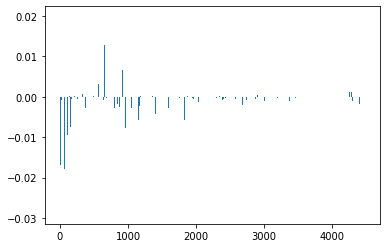

In [60]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [61]:
c = pd.DataFrame([[X_train.columns[i],abs(v)] for i,v in enumerate(importance)])

In [62]:
c.sort_values(1,ascending=False)[:20]

,0,1
54,CYCLOPHOSPHAMIDEDosage,0.029014
1345,HEPARIN SODIUMDosage,0.027526
4,DrugChar1,0.020289
623,.ALPHA.-TOCOPHEROLDosage,0.019954
2753,ERYTHROPOIETINDosage,0.018660
67,ADALIMUMABDosage,0.017963
59,RITUXIMABDosage,0.017845
1100,ENZALUTAMIDEDosage,0.017812
337,DUPILUMABDosage,0.016869
8,DrugChar2,0.016852


In [66]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [64]:
PCA = PCA(n_components=15)

In [69]:
pca_lr = make_pipeline(StandardScaler(),PCA(n_components=15),LogisticRegression())
pca_lr.fit(X_train,y_train)
print('Train : ',pca_lr.score(X_train,y_train))
print('Test : ',pca_lr.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train :  0.7400518371703003


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Test :  0.7095833333333333


In [70]:
pca_lr = make_pipeline(StandardScaler(),PCA(n_components=15),DecisionTreeClassifier())
pca_lr.fit(X_train,y_train)
print('Train : ',pca_lr.score(X_train,y_train))
print('Test : ',pca_lr.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train :  0.805000762311328


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Test :  0.74625


In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
pca_lr = make_pipeline(StandardScaler(),PCA(n_components=15),RandomForestClassifier())
pca_lr.fit(X_train,y_train)
print('Train : ',pca_lr.score(X_train,y_train))
print('Test : ',pca_lr.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train :  0.9437414239975606


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Test :  0.8129166666666666


In [73]:
from xgboost import XGBClassifier

In [74]:
pca_lr = make_pipeline(StandardScaler(),PCA(n_components=15),XGBClassifier())
pca_lr.fit(X_train,y_train)
print('Train : ',pca_lr.score(X_train,y_train))
print('Test : ',pca_lr.score(X_test,y_test))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Train :  0.8133861869187377


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Test :  0.7929166666666667
